<a href="https://colab.research.google.com/github/charlesncn/Multiple-LinearRegression-py-2/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# upload csv file to colab
from google.colab import files
import io
uploaded = files.upload()

Saving User_Data.csv to User_Data (1).csv


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# describing the data
userData = pd.read_csv(io.BytesIO(uploaded['User_Data.csv']))



In [82]:
userData.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [85]:
# remove 'Purchased' column
userDF = userData.loc[ :, userData.columns != 'Purchased']

userDF

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


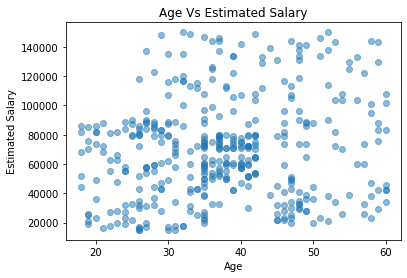

In [86]:
# plotting

plt.scatter(userDF['Age'], userDF['EstimatedSalary'], alpha=0.5)
plt.title("Age Vs Estimated Salary")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

Text(0, 0.5, 'Avg EstimatedSalary')

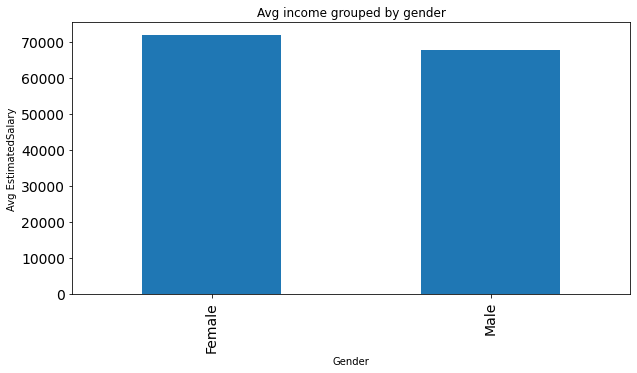

In [87]:
# creating a figure object of EstimatedSalary vs Age

a = userDF.groupby(['Gender'])['EstimatedSalary'].mean().plot.bar(
    figsize= (10,5),
    fontsize= 14
)

# set tittle

a.set_title('Avg income grouped by gender')
a.set_xlabel('Gender')
a.set_ylabel('Avg EstimatedSalary')

In [88]:
# create dummy variable gender
userDF['Male'] = np.where(userDF['Gender']=='Male', 1,0)
userDF['Female'] = np.where(userDF['Gender'] == 'Female', 1,0)

# drop original gender column
userDF.drop(columns=['Gender'], axis=1, inplace=True)

In [26]:
userDF.head()

,User ID,Age,EstimatedSalary,Male,Female
0,15624510,19,19000,1,0
1,15810944,35,20000,1,0
2,15668575,26,43000,0,1
3,15603246,27,57000,0,1
4,15804002,19,76000,1,0


In [39]:
# setting dependent and independent variables
dependent_variable = 'EstimatedSalary'

In [91]:
independent_variables = userDF.columns.tolist()
# remove dependent variable from the list
independent_variables.remove(dependent_variable)
independent_variables.remove('User ID')
independent_variables

['Age', 'Male', 'Female']

In [92]:
# creating data of the independent variables
X = userDF[independent_variables].values

# creating data for dependent variable
y = userDF[dependent_variable].values

In [93]:
# slitting data for trainning and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
x_train[0:10]

array([[0.95238095, 1.        , 0.        ],
       [0.97619048, 0.        , 1.        ],
       [0.14285714, 0.        , 1.        ],
       [0.19047619, 0.        , 1.        ],
       [0.95238095, 0.        , 1.        ],
       [0.57142857, 0.        , 1.        ],
       [0.52380952, 0.        , 1.        ],
       [0.97619048, 1.        , 0.        ],
       [0.66666667, 0.        , 1.        ],
       [0.54761905, 0.        , 1.        ]])

In [96]:
#fitting multiple linear regression to the training set

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [97]:
# predict the test sett results
y_pred = regressor.predict(x_test)

In [98]:
# root mean squared error
math.sqrt(mean_squared_error(y_test, y_pred))

31675.340642209358

In [99]:
r2_score(y_test, y_pred)

0.028136864220849933